In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('data.csv')
dataset = dataset.drop(columns=['Unnamed: 0'])

In [3]:
dataset.head(1)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.0219,2,0.165,-8.795,1,0.431,150.062,4.0,0.286,1,Mask Off,Future


In [24]:
# Q1: what are the top 5 artists with the most songs in the dataset?

In [5]:
top5 = dataset['artist'].value_counts().head(5)

In [6]:
# second approach
dataset.groupby('artist').size().sort_values(ascending=False).head(5)

artist
Drake              16
Rick Ross          13
Disclosure         12
Backstreet Boys    10
WALK THE MOON      10
dtype: int64

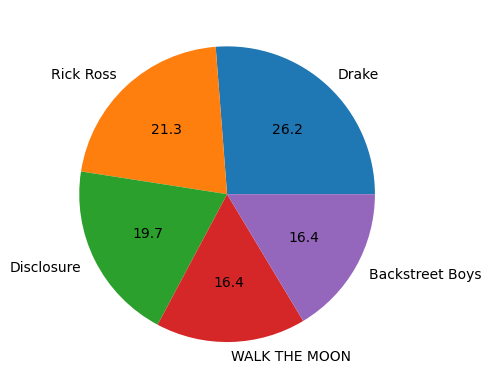

In [7]:
plt.pie(top5,labels=top5.index,autopct='%.1f')
plt.show()

In [26]:
# Q2:  what is the average duration of songs in the dataset?

In [9]:
avg_duration = round(dataset['duration_ms'].mean()/(1000*60),2)
avg_duration


4.11

<AxesSubplot:ylabel='duration_ms'>

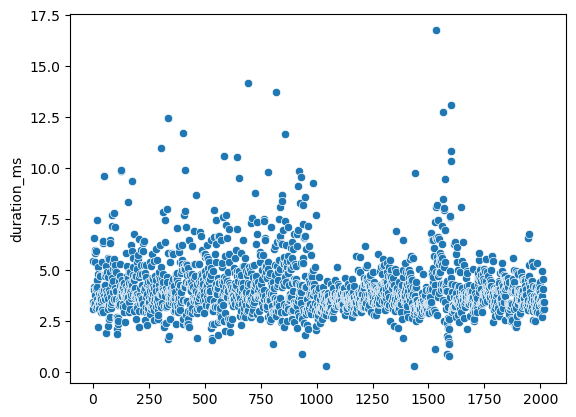

In [10]:
sns.scatterplot(data=dataset["duration_ms"]/(1000*60))

In [29]:
# Q3:  what is the distribution of energy levels in the dataset? Are there any outliers?

<AxesSubplot:xlabel='energy', ylabel='Count'>

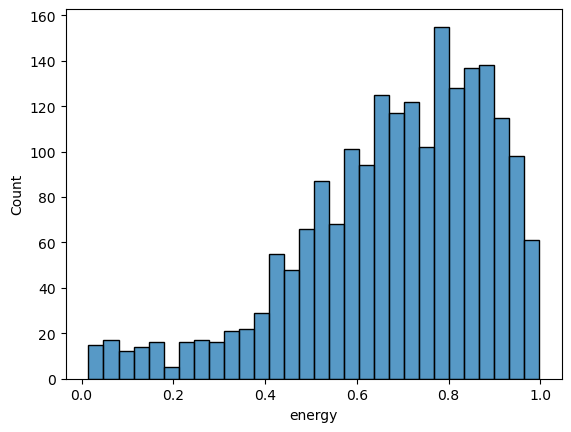

In [13]:
sns.histplot(dataset['energy'],bins=30)

In [23]:
# finding the inter quartile range
q1 = dataset['energy'].quantile(.25)
q3 = dataset['energy'].quantile(.75)
iqr = q3 - q1
outliers = dataset[(dataset['energy']<q1 - 1.5*iqr) | (dataset['energy']>q3+1.5*iqr)]
total_len = len(dataset['energy'])
outlier_len = len(outliers)
print(f'yes. there are outliers and the length of outliers is : {outlier_len}')

yes. there are outliers and the length of outliers is : 54


In [30]:
# Q4:  what is the distribution of duration levels in the dataset? Are there any outliers?

[Text(0.5, 0, 'duration_min')]

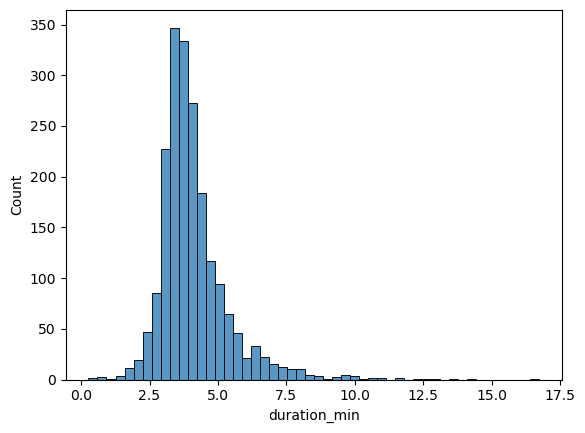

In [38]:
sns.histplot(dataset['duration_ms']/(1000*60),bins=50).set(xlabel='duration_min')


In [51]:
# finding the inter quartile range
q1 = (dataset['duration_ms']/(1000*60)).quantile(.25)
q3 = (dataset['duration_ms']/(1000*60)).quantile(.75)
iqr = q3 - q1
outliers = dataset[(dataset['duration_ms']/(1000*60) < q1-1.5*iqr) | (dataset['duration_ms']/(1000*60)>q3+1.5*iqr)]

print(f'Yes.There are outliers and the length of outliers is : {len(outliers)}')

Yes.There are outliers and the length of outliers is : 141


In [52]:
# Q5: What is the correlation between loudness and energy in the dataset?

In [56]:
corr = dataset['loudness'].corr(dataset['energy'])
corr

0.7621769711494927

<AxesSubplot:xlabel='loudness', ylabel='energy'>

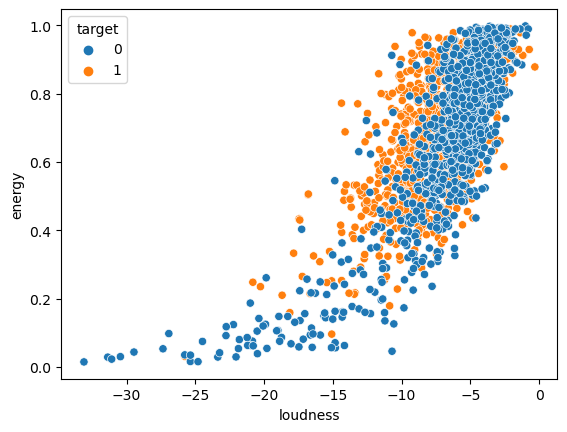

In [59]:
sns.scatterplot(data=dataset,x='loudness',y='energy',hue='target')

In [60]:
# Q6: What are the most common keys and modes in the dataset?

In [84]:
keymode = dataset.groupby(['key','mode']).size().reset_index(name='count')

<AxesSubplot:xlabel='key', ylabel='count'>

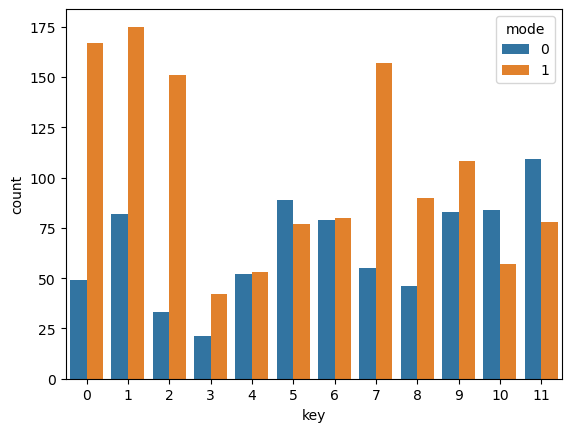

In [87]:
sns.barplot(x='key',y='count',hue='mode',data=keymode)

In [88]:
# Q7: What are the top 10 instrumental tracks?

In [106]:
top_10_ins = dataset['instrumentalness'].sort_values(ascending=False).head(10)
song = dataset.iloc[top_10_ins.index][['song_title','instrumentalness']]

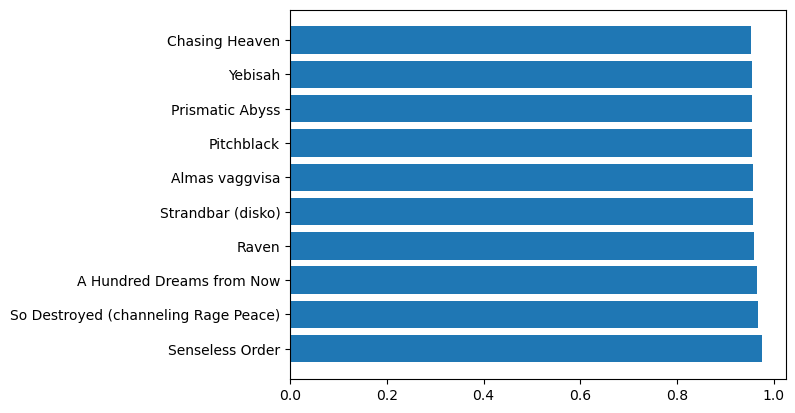

In [108]:
plt.barh(song['song_title'],song['instrumentalness'])
plt.show()

In [109]:
# Q8: top 10 energetic song title

In [112]:
top_10_energy = dataset['energy'].sort_values(ascending=False).head(10)
e_song = dataset.iloc[top_10_energy.index][['song_title','energy']]


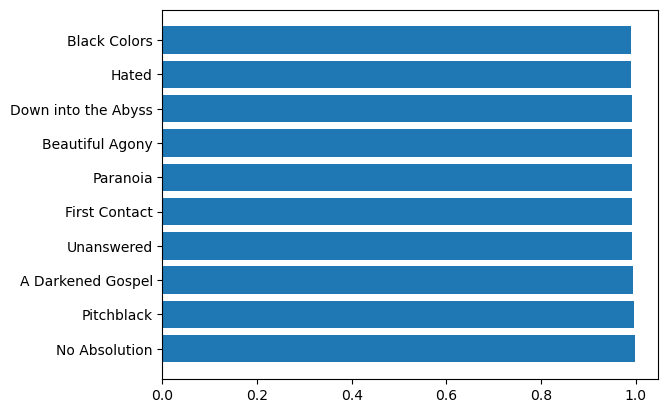

In [114]:
plt.barh(e_song['song_title'],e_song['energy'])
plt.show()